<h3>3. Advance Feature extraction </h3>

In [ ]:
#importing libraries
import math
import re
import distance
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import plotly.express as px
import plotly.graph_objects as go
sns.color_palette('bright')
sns.set(style='darkgrid')
import nltk
import string

In [ ]:
#importing other useful libraries
import warnings
warnings.filterwarnings("ignore")
from plotly.offline import iplot
from sklearn.pipeline import make_pipeline 
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from fuzzywuzzy import fuzz
from sklearn.manifold import TSNE
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
print("ready..set..go...")

ready..set..go...


In [ ]:
#importing csv file (after basic feature)
df = pd.read_csv('for_A_f_e.csv')


In [ ]:
#checking head of the file
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,common_word,Total_words,share_words,Q1len,Q2len,Q1_nwords,Q2_nwords,frequency_qid1,frequency_qid2,frequency_q1+q2,frequency_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,10.0,23.0,0.434783,66,57,14,12,1,1,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4.0,20.0,0.200000,51,88,8,13,4,1,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,4.0,24.0,0.166667,73,59,14,10,1,1,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,0.0,19.0,0.000000,50,65,11,9,1,1,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,2.0,20.0,0.100000,76,39,13,7,3,1,4,2


In [ ]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               404290 non-null  int64  
 1   qid1             404290 non-null  int64  
 2   qid2             404290 non-null  int64  
 3   question1        404289 non-null  object 
 4   question2        404288 non-null  object 
 5   is_duplicate     404290 non-null  int64  
 6   common_word      404290 non-null  float64
 7   Total_words      404290 non-null  float64
 8   share_words      404290 non-null  float64
 9   Q1len            404290 non-null  int64  
 10  Q2len            404290 non-null  int64  
 11  Q1_nwords        404290 non-null  int64  
 12  Q2_nwords        404290 non-null  int64  
 13  frequency_qid1   404290 non-null  int64  
 14  frequency_qid2   404290 non-null  int64  
 15  frequency_q1+q2  404290 non-null  int64  
 16  frequency_q1-q2  404290 non-null  int6

In [ ]:
#describing the data
df.describe()

,id,qid1,qid2,is_duplicate,common_word,Total_words,share_words,Q1len,Q2len,Q1_nwords,Q2_nwords,frequency_qid1,frequency_qid2,frequency_q1+q2,frequency_q1-q2
count,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198,4.511610,21.126112,0.223362,59.536709,60.108365,10.944592,11.185120,2.827609,3.046961,5.874570,1.845715
std,116708.614502,157751.700002,159903.182629,0.482588,3.098656,8.592622,0.128336,29.940655,33.863870,5.431949,6.311076,4.487418,6.026871,9.091068,5.187882
min,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000,2.000000,15.000000,0.125000,39.000000,39.000000,7.000000,7.000000,1.000000,1.000000,2.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000,4.000000,19.000000,0.217391,52.000000,51.000000,10.000000,10.000000,1.000000,1.000000,3.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000,6.000000,25.000000,0.318182,72.000000,72.000000,13.000000,13.000000,3.000000,2.000000,5.000000,2.000000
max,404289.000000,537932.000000,537933.000000,1.000000,41.000000,166.000000,0.500000,623.000000,1169.000000,125.000000,237.000000,50.000000,120.000000,157.000000,119.000000


In [ ]:
#Checking for  rows with null values
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

            id    qid1  ...  frequency_q1+q2 frequency_q1-q2
105780  105780  174363  ...                4               0
201841  201841  303951  ...                3               1
363362  363362  493340  ...                2               0

[3 rows x 17 columns]


In [ ]:
# Filling the null values with space ' '
df = df.fillna('')

In [ ]:
#Checking for  rows with null values
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate, common_word, Total_words, share_words, Q1len, Q2len, Q1_nwords, Q2_nwords, frequency_qid1, frequency_qid2, frequency_q1+q2, frequency_q1-q2]
Index: []


<h3>3.1.Preprocessing the Text </h3>

- Preprocessing of text :
    - Removing html tags 
    - Removing Punctuations
    - Performing stemming
    - Removing Stopwords

In [ ]:
#downloading the stop words
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# To get the results in 4 decemal points
SAFE_DIV = 0.0001 

In [ ]:
# creating stop_words variable
STOP_WORDS = stopwords.words("english")

In [ ]:
#method for preprocessing the text
def preprocessing(var):
    var = str(var).lower()
    var = var.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    var = re.sub(r"([0-9]+)000000", r"\1m", var)
    var = re.sub(r"([0-9]+)000", r"\1k", var)
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(var) == type(''):
        var = re.sub(pattern, ' ',var)
    
    
    if type(var) == type(''):
        var = porter.stem(var)
        example1 = BeautifulSoup(var)
        var = example1.get_text()
               
    
    return var

<h2> 3.2 NLP and Fuzzy Features </h2>

Definitions:
- __Token__: Tokens are nothing but words(splitting a sentence)
- __Stop_Word__ : stop words from NLTK library .
- __Word__ : A token which is not a stop_word


Features:
- __cwc_min__ :  Ratio of common_word_count to min lenghth of word count of Q1 and Q2 <br>cwc_min = common_word_count / (min(len(q1_words), len(q2_words))
<br>
<br>
- __cwc_max__ :  Ratio of common_word_count to max lenghth of word count of Q1 and Q2 <br>cwc_max = common_word_count / (max(len(q1_words), len(q2_words))
<br>
<br>
- __csc_min__ :  Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2 <br> csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))
<br>
<br>
- __csc_max__ :  Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2<br>csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))
<br>
<br>
- __ctc_min__ :  Ratio of common_token_count to min lenghth of token count of Q1 and Q2<br>ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))
<br>
<br>

- __ctc_max__ :  Ratio of common_token_count to max lenghth of token count of Q1 and Q2<br>ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))
<br>
<br>
        
- __last_word_eq__ :  Check if last word of both questions is equal or not<br>
last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])
<br>
<br>

- __first_word_eq__ :  Check if First word of both questions is equal or not<br>
first_word_eq = int(q1_tokens[0] == q2_tokens[0])
<br>
<br>
        
- __abs_len_diff__ :  Abs. length difference<br>abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))
<br>
<br>

- __mean_len__ :  Average Token Length of both Questions<br>mean_len = (len(q1_tokens) + len(q2_tokens))/2
<br>
<br>
Fuzz Features:


- __fuzz_ratio__ , __fuzz_partial_ratio__,__token_sort_ratio__ , __token_set_ratio__ : https://www.geeksforgeeks.org/fuzzywuzzy-python-library/





- __longest_substr_ratio__ :  Ratio of length longest common substring to min lenghth of token count of Q1 and Q2
<br>

 longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))


In [ ]:
#method for getting taken features 
def get_token_features(q1, q2):
    token_features = [0.0]*10
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features

In [ ]:
# getting  the Longest Common sub string

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

<h2>usefull links :</h2>

Blog:

http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
    
stack-over-flow:

 https://stackoverflow.com/questions/31806695/when-to-use-which-fuzz-function-to-compare-2-strings

github link:

https://github.com/seatgeek/fuzzywuzzy

In [ ]:
#extracting features from our data fram and rewriting it
def extract_features(df):
    # preprocessing each question
    df["question1"] = df["question1"].fillna("").apply(preprocessing)
    df["question2"] = df["question2"].fillna("").apply(preprocessing)

    print("token features...")
    
    # Merging Features with dataset
    
    token_features = df.apply(lambda x: get_token_features(x["question1"], x["question2"]), axis=1)
    
    df["cwc_min"]       = list(map(lambda x: x[0], token_features))
    df["cwc_max"]       = list(map(lambda x: x[1], token_features))
    df["csc_min"]       = list(map(lambda x: x[2], token_features))
    df["csc_max"]       = list(map(lambda x: x[3], token_features))
    df["ctc_min"]       = list(map(lambda x: x[4], token_features))
    df["ctc_max"]       = list(map(lambda x: x[5], token_features))
    df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    df["first_word_eq"] = list(map(lambda x: x[7], token_features))
    df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    df["mean_len"]      = list(map(lambda x: x[9], token_features))
   
    #Computing Fuzzy Features and Merging with Dataset
    print("fuzzy features..")

    df["token_set_ratio"]       = df.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
    # The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and 
    # then joining them back into a string We then compare the transformed strings with a simple ratio().
    df["token_sort_ratio"]      = df.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
    df["fuzz_ratio"]            = df.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
    df["fuzz_partial_ratio"]    = df.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
    df["longest_substr_ratio"]  = df.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
    return df

In [ ]:
#applying it for original dataframe
print("Extracting features for train:")
df = extract_features(df)

Extracting features for train:
token features...
fuzzy features..


In [ ]:
#checking head
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,common_word,Total_words,share_words,Q1len,Q2len,Q1_nwords,Q2_nwords,frequency_qid1,frequency_qid2,frequency_q1+q2,frequency_q1-q2,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,10.0,23.0,0.434783,66,57,14,12,1,1,2,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,4.0,20.0,0.200000,51,88,8,13,4,1,5,3,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,4.0,24.0,0.166667,73,59,14,10,1,1,2,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,63,63,43,47,0.166667
3,3,7,8,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0,0.0,19.0,0.000000,50,65,11,9,1,1,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,28,24,9,14,0.039216
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,2.0,20.0,0.100000,76,39,13,7,3,1,4,2,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,67,47,35,56,0.175000


In [ ]:
#describe the data set
df.describe()

,id,qid1,qid2,is_duplicate,common_word,Total_words,share_words,Q1len,Q2len,Q1_nwords,Q2_nwords,frequency_qid1,frequency_qid2,frequency_q1+q2,frequency_q1-q2,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
count,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198,4.511610,21.126112,0.223362,59.536709,60.108365,10.944592,11.185120,2.827609,3.046961,5.874570,1.845715,0.587280,0.458783,0.572168,0.435548,0.555697,0.433078,0.317831,0.513641,3.777912,11.257303,71.597541,62.187356,58.407314,64.678006,0.388795
std,116708.614502,157751.700002,159903.182629,0.482588,3.098656,8.592622,0.128336,29.940655,33.863870,5.431949,6.311076,4.487418,6.026871,9.091068,5.187882,0.309490,0.274171,0.336518,0.299950,0.265151,0.246421,0.465634,0.499815,4.970816,5.185872,20.633393,19.125742,21.954197,18.792973,0.229686
min,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000,2.000000,15.000000,0.125000,39.000000,39.000000,7.000000,7.000000,1.000000,1.000000,2.000000,0.000000,0.399992,0.249997,0.333322,0.199996,0.363633,0.243243,0.000000,0.000000,1.000000,8.000000,58.000000,49.000000,41.000000,50.000000,0.210526
50%,202144.500000,192182.000000,197052.000000,0.000000,4.000000,19.000000,0.217391,52.000000,51.000000,10.000000,10.000000,1.000000,1.000000,3.000000,0.000000,0.624992,0.499975,0.599988,0.399992,0.571420,0.416663,0.000000,1.000000,2.000000,10.000000,75.000000,62.000000,59.000000,65.000000,0.344828
75%,303216.750000,346573.500000,354692.500000,1.000000,6.000000,25.000000,0.318182,72.000000,72.000000,13.000000,13.000000,3.000000,2.000000,5.000000,2.000000,0.799984,0.666644,0.857131,0.666644,0.769225,0.624992,1.000000,1.000000,5.000000,13.500000,89.000000,77.000000,76.000000,79.000000,0.531250
max,404289.000000,537932.000000,537933.000000,1.000000,41.000000,166.000000,0.500000,623.000000,1169.000000,125.000000,237.000000,50.000000,120.000000,157.000000,119.000000,0.999996,0.999996,0.999995,0.999995,0.999996,0.999996,1.000000,1.000000,233.000000,140.500000,100.000000,100.000000,100.000000,100.000000,0.994186


In [ ]:
#getting info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    404290 non-null  int64  
 1   qid1                  404290 non-null  int64  
 2   qid2                  404290 non-null  int64  
 3   question1             404290 non-null  object 
 4   question2             404290 non-null  object 
 5   is_duplicate          404290 non-null  int64  
 6   common_word           404290 non-null  float64
 7   Total_words           404290 non-null  float64
 8   share_words           404290 non-null  float64
 9   Q1len                 404290 non-null  int64  
 10  Q2len                 404290 non-null  int64  
 11  Q1_nwords             404290 non-null  int64  
 12  Q2_nwords             404290 non-null  int64  
 13  frequency_qid1        404290 non-null  int64  
 14  frequency_qid2        404290 non-null  int64  
 15  

In [ ]:
#saving dataset for predicting the results
df.to_csv("Nlp_Features.csv",index=False)

<h3>3.3 Analysis of extracted features </h3>



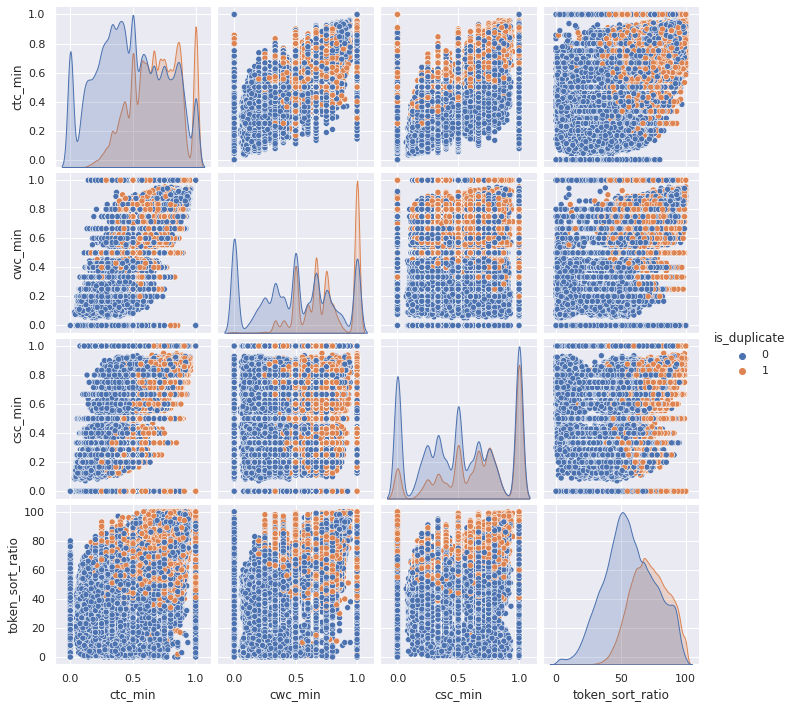

In [ ]:
#creating sns pairplot for features
n = df.shape[0]
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']][0:n], hue='is_duplicate', vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'])
plt.show()

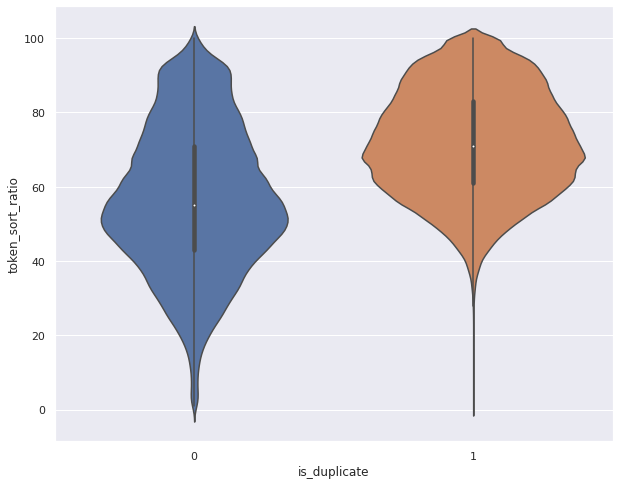

In [ ]:
# Distribution of the token_sort_ratio
plt.figure(figsize=(10, 8))
sns.violinplot(x = 'is_duplicate', y = 'token_sort_ratio', data = df[0:]  )
plt.show()

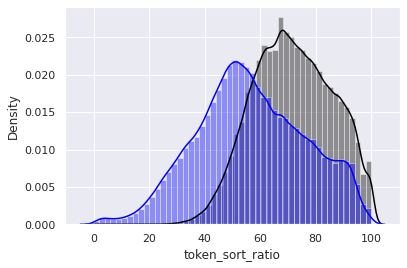

In [ ]:
#token_sort_ratio
sns.distplot(df[df['is_duplicate'] == 1.0]['token_sort_ratio'][0:] , label = "1", color = 'black')
sns.distplot(df[df['is_duplicate'] == 0.0]['token_sort_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

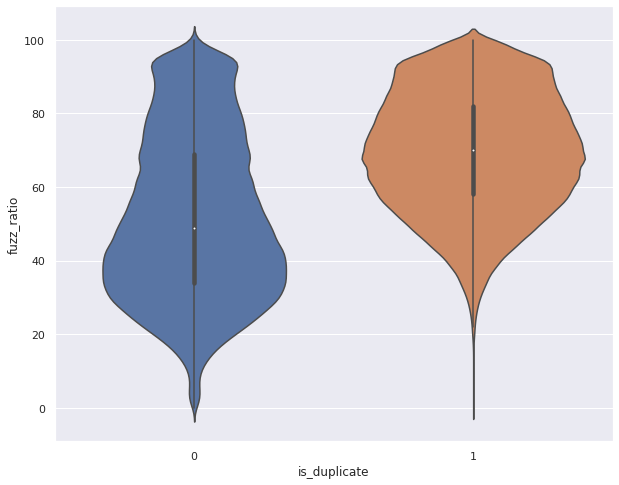

In [ ]:
#fuzz_ratio
plt.figure(figsize=(10, 8))
sns.violinplot(x = 'is_duplicate', y = 'fuzz_ratio', data = df[0:]  )
plt.show()

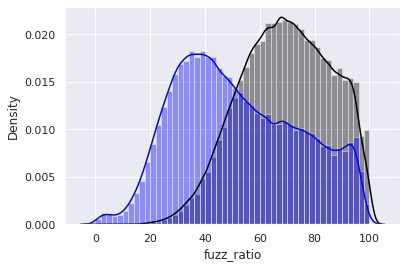

In [ ]:
#fuzz_ratio
sns.distplot(df[df['is_duplicate'] == 1.0]['fuzz_ratio'][0:] , label = "1", color = 'black')
sns.distplot(df[df['is_duplicate'] == 0.0]['fuzz_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

In [ ]:
#creating plots using pandas_profiling
import pandas_profiling as pp


In [ ]:
from pandas_profiling import ProfileReport
#using minimal report for genrating the html file faster for large datas
profile = ProfileReport(df, minimal=True)
profile.to_file(output_file="nlpfeatures.html")